# **CAPSTONE PROJECT -- PREDICTING MOVIE SUCCESS**

## Problem Statement


A major film studio aims to predict the success of its upcoming movies based on IMDb scores, with the goal of categorizing them as either a "Hit," "Average," or "Flop." This prediction will be made by analyzing various movie attributes using advanced data analysis techniques and machine learning. The studio seeks to optimize its production decisions, enhance marketing strategies, and gain insights into factors that influence movie success. The machine learning model will analyze IMDb score patterns and other movie characteristics to improve the studio's understanding of the elements that lead to a movie's commercial and critical success

## About the dataset (Movie Metadata)

The dataset contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

|Variable Name |	Description|
| --- | --- |
|movie_title	 | Title of the Movie|
|duration	| Duration in minutes|
|director_name	| Name of the Director of the Movie|
|director_facebook_likes |	Number of likes of the Director on his Facebook Page|
|actor_1_name |	Primary actor starring in the movie|
|actor_1_facebook_likes |	Number of likes of the Actor_1 on his/her Facebook Page|
|actor_2_name |	Other actor starring in the movie|
|actor_2_facebook_likes	| Number of likes of the Actor_2 on his/her Facebook Page|
|actor_3_name |	Other actor starring in the movie|
|actor_3_facebook_likes |	Number of likes of the Actor_3 on his/her Facebook Page|
|num_user_for_reviews |	Number of users who gave a review|
|num_critic_for_reviews |	Number of critical reviews on imdb|
|num_voted_users | 	Number of people who voted for the movie|
|cast_total_facebook_likes |	Total number of facebook likes of the entire cast of the movie|
|movie_facebook_likes |	Number of Facebook likes in the movie page|
|plot_keywords |	Keywords describing the movie plot|
|facenumber_in_poster |	Number of the actor who featured in the movie poster|
|color |	Film colorization. ‘Black and White’ or ‘Color’|
|genres |	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’|
|title_year |	The year in which the movie is released (1916:2016)|
|language |	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc|
|country |	Country where the movie is produced|
|content_rating |	Content rating of the movie|
|aspect_ratio |	Aspect ratio the movie was made in|
|movie_imdb_link |	IMDB link of the movie|
|gross |	Gross earnings of the movie in Dollars|
|budget |	Budget of the movie in Dollars|
|imdb_score |	IMDB Score of the movie on IMDB|

# **Data Exploration**

## **Importing Libararies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter

import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
df = pd.read_csv('movie_metadata.csv')

In [ ]:
# Display the dataset
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df.shape

(5043, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


# **Categorizing the target varible**
Here we are categorizing the target variable in such a way that IMDB score between 1 and 3 is FLOP , between 3 and 6 is AVG, between 6 and 10 is HIT.

In [ ]:
# Function to categorize IMDB scores into three categories: 'Flop', 'Average', and 'Hit'.
# Applies the categorization function to the 'imdb_score' column and creates a new 'classify' column.

def categorize_imdb(score):
    if 1 <= score < 3:
        return 'Flop'
    elif 3 <= score < 6:
        return 'Average'
    elif 6 <= score <= 10:
        return 'Hit'
    else:
        return 'Unknown'

df['classify'] = df['imdb_score'].apply(categorize_imdb)
print(df['classify'].value_counts())

classify
Hit        3589
Average    1413
Flop         41
Name: count, dtype: int64


In [ ]:
# Checking the new coulumn
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,classify
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Hit
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Hit


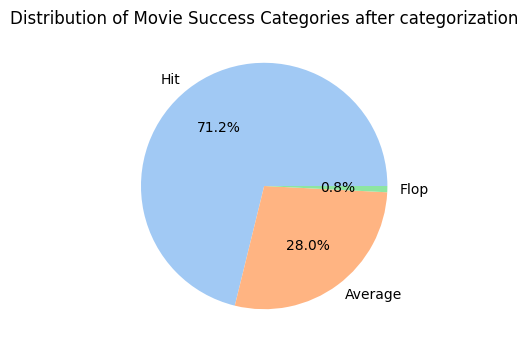

In [ ]:
# Visualization of Categorized IMDB Scores

plt.figure(figsize=(4,4))
df['classify'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Movie Success Categories after categorization')
plt.ylabel('')  # Removes the y-label
plt.show()

In [ ]:
# Setting up the visual style
sns.set(style="whitegrid")

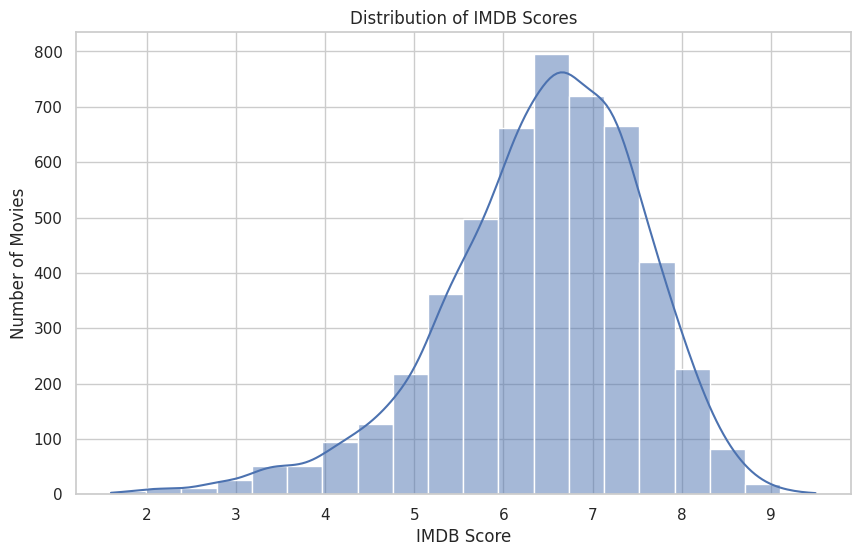

In [ ]:
# Distribution of IMDB scores
plt.figure(figsize=(10,6))
sns.histplot(df['imdb_score'], bins=20, kde=True)
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Number of Movies')
plt.show()

The IMDb scores are generally concentrated between 6 and 8, with a peak around 6.5 - 7. The distribution is slightly skewed to the left.

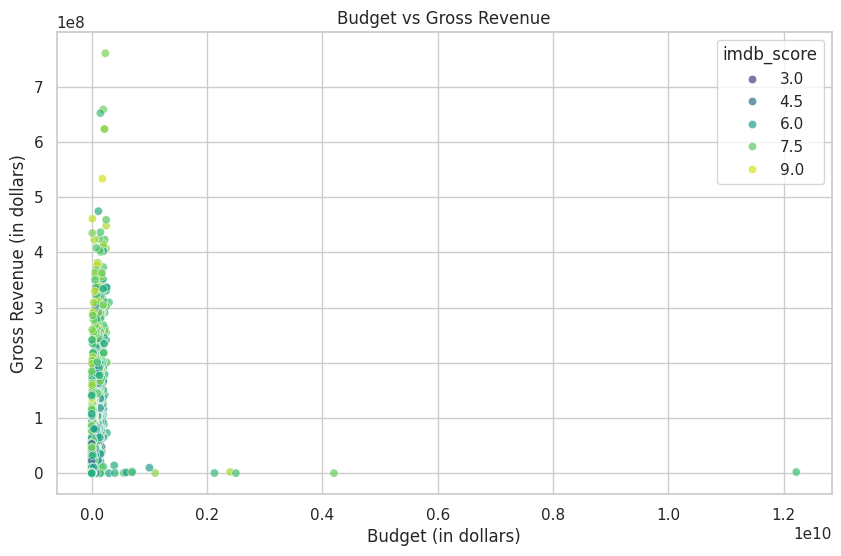

In [ ]:
# Relationship between Budget and Gross revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x='budget', y='gross', data=df, hue='imdb_score', palette='viridis', alpha=0.7)
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget (in dollars)')
plt.ylabel('Gross Revenue (in dollars)')
plt.show()

There's a positive relationship between budget and gross revenue, with some movies having high gross revenue despite lower budgets. The color gradient represents IMDb scores, showing that higher-budget movies don't always guarantee higher IMDb ratings.

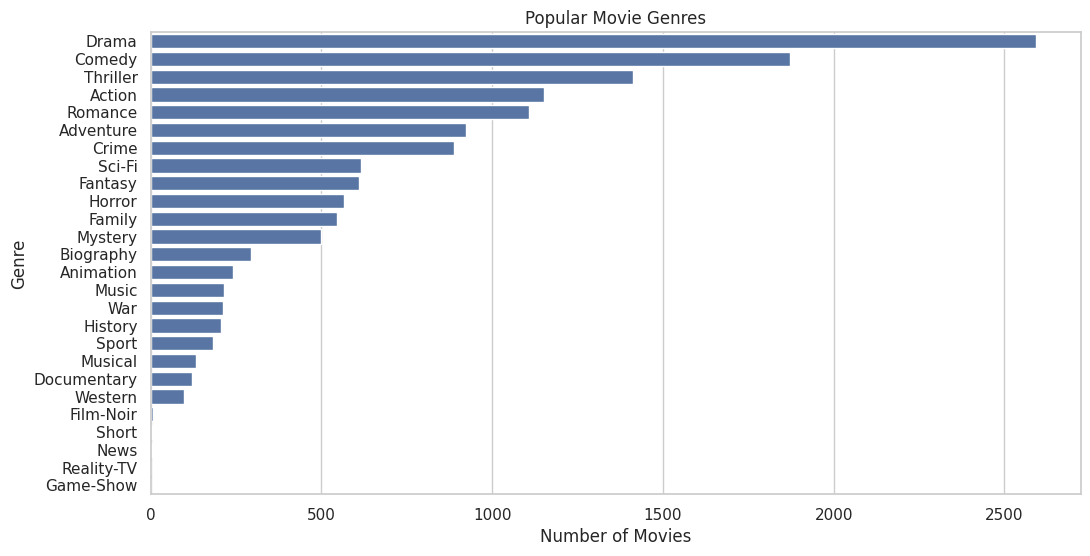

In [ ]:
# Popular Genres (splitting genres into separate rows for accurate counts)
pop_genres = df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,6))
sns.countplot(y=pop_genres, order=pop_genres.value_counts().index)
plt.title('Popular Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

Action, Drama, Thriller and Comedy are the most popular genres.

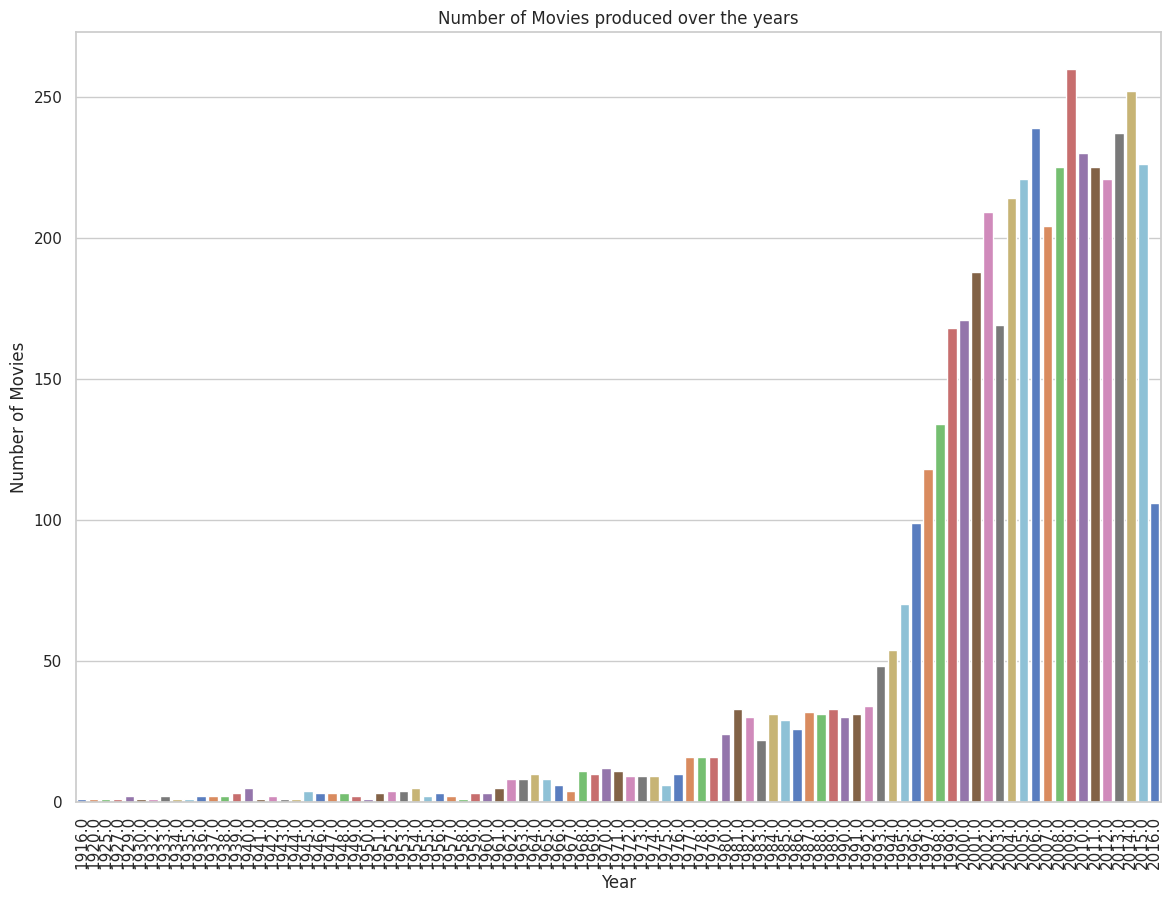

In [ ]:
# Movie production trends over the years
plt.figure(figsize=(14,10))
sns.countplot(x='title_year', data=df, palette='muted')
plt.title('Number of Movies produced over the years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

The number of movies produced increased significantly from the early 2000s, peaking around 2009 to 2014. The trend suggests an overall growth in movie production.

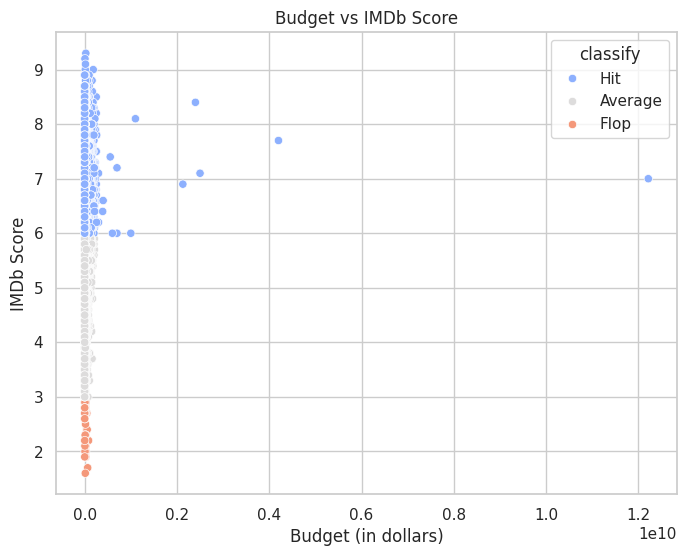

In [ ]:
# Scatterplot of budget vs IMDb scores
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='budget', y='imdb_score', hue='classify', palette='coolwarm')
plt.title('Budget vs IMDb Score')
plt.xlabel('Budget (in dollars)')
plt.ylabel('IMDb Score')
plt.show()

 The majority of movies have relatively low budgets (clustered close to the left side of the plot). There is no clear linear correlation between budget and IMDb score, but higher budget movies tend to perform better (with IMDb scores above 7). Movies classified as hits dominate the higher-budget category, whereas flops remain concentrated at low budgets.

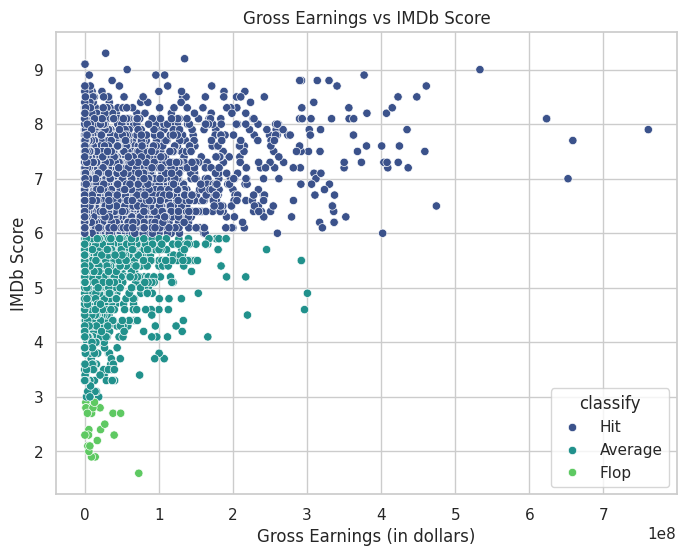

In [ ]:
# Scatterplot of gross earnings vs IMDb scores
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='gross', y='imdb_score', hue='classify', palette='viridis')
plt.title('Gross Earnings vs IMDb Score')
plt.xlabel('Gross Earnings (in dollars)')
plt.ylabel('IMDb Score')
plt.show()

There appears to be a more consistent positive relationship between gross earnings and IMDb score. Hits generally have both high IMDb scores and higher gross earnings, while flops are located in the lower left (low gross, low IMDb score). As the gross increases, the density of hits increases.

# **Handling Missing values**

In [ ]:
#check for samples that have missing values
df.isna().sum().sort_values(ascending=False)

,0
gross,884
budget,492
aspect_ratio,329
content_rating,303
plot_keywords,153
title_year,108
director_name,104
director_facebook_likes,104
num_critic_for_reviews,50
actor_3_name,23


In [ ]:
#Droping the samples that have missing values
df.dropna(inplace=True)

In [ ]:
#Shape of the dataset after handling missing values
df.shape

(3755, 29)

Lets find out how the string variables are behaving

In [ ]:
#List of variables in the datset
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'classify'],
      dtype='object')

In [ ]:
#Describing the categorical data
df.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating,classify
count,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755
unique,2,1658,2187,745,1427,3654,2586,3655,3655,33,45,12,3
top,Color,Steven Spielberg,Morgan Freeman,Comedy|Drama|Romance,Robert De Niro,Victor Frankenstein,Steve Coogan,halloween|masked killer|michael myers|slasher|...,http://www.imdb.com/title/tt0077651/?ref_=fn_t...,English,USA,R,Hit
freq,3631,25,20,147,42,3,8,3,3,3598,2986,1700,2710


'movie_title','movie_imdb_link' columns are almost unique,so they doesn't contribute in predicting target variable

In [ ]:
#Dropping 2 columns
df.drop(columns=['movie_title','movie_imdb_link'],inplace=True)

# **Label Encoding**

In [ ]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
df[cat_list]=df[cat_list].apply(lambda x:le.fit_transform(x))

# **Correlation**
To find out whether there is any relation between variables, in other terms multicollineariaty.

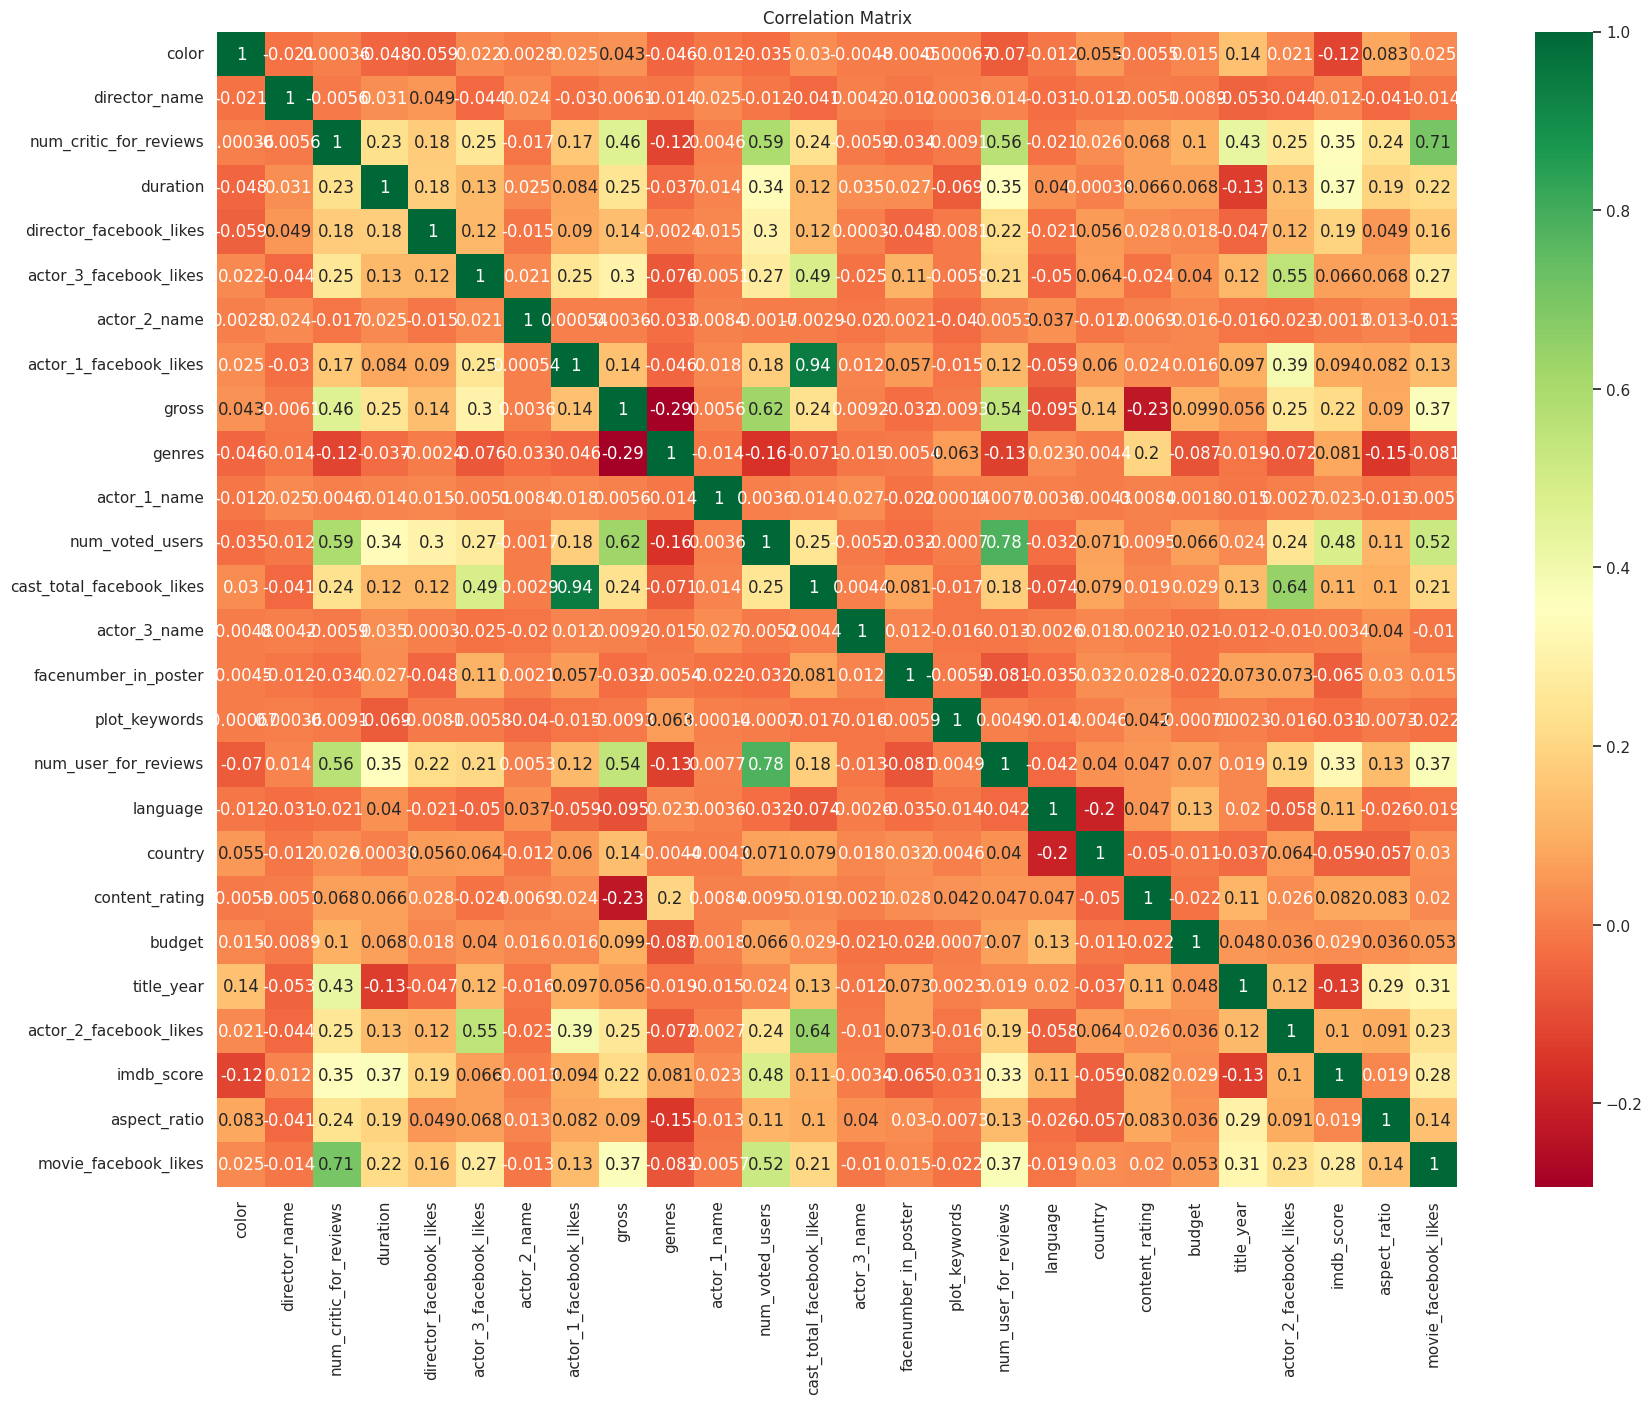

In [ ]:
#Finding Correlation between variables

# Select only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns # Selects columns with numerical data types
correlation_matrix = df[numeric_cols].corr() # Calculates the correlation matrix using only the numeric columns

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn') # Creates a heatmap visualization of the correlation matrix
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Removing few columns due to multicollinearity
df.drop(columns=['cast_total_facebook_likes','num_user_for_reviews'],inplace=True)

These variables that are correlated cause errors in the prediction, so removing them

In the correlation matrix, cast_total_facebook_likes is highly correlated with other variables such as actor_1_facebook_likes (0.96). This suggests that it provides similar information, making it redundant.

removing num_user_for_reviews and keeping num_voted_users, as the latter provides a broader measure of audience engagement (correlation: 0.78)

Removing the column "imdb_score" since we have "classify"

I am gonna train the model with "classify" not with "imdb_score" so dropping the column.

In [ ]:
#Removing the column "imdb_score" since we have "classify"
df.drop(columns=['imdb_score'],inplace=True)

In [ ]:
# Check for changes made
df.shape

(3755, 24)

In [ ]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,plot_keywords,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,classify
5026,1,1167,81.0,110.0,107.0,45.0,299,576.0,136007.0,687,...,3473,11,13,9,4500.0,61,133.0,12,171,Hit
5027,1,612,64.0,90.0,397.0,0.0,1521,5.0,673780.0,635,...,212,25,22,5,10000.0,57,0.0,8,697,Hit
5033,1,1424,143.0,77.0,291.0,8.0,517,291.0,424760.0,708,...,2127,9,43,7,7000.0,61,45.0,8,19000,Hit
5035,1,1343,56.0,81.0,0.0,6.0,1654,121.0,2040920.0,168,...,931,29,43,9,7000.0,49,20.0,2,0,Hit
5042,1,791,43.0,90.0,16.0,16.0,264,86.0,85222.0,627,...,304,9,43,6,1100.0,61,23.0,8,456,Hit


# **CLASSIFICATION MODEL BUILDING**
Splitting the data into X and y where X contains Indepentent variables and y contain Target/Dependent variable.

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop('classify', axis=1)
y = df['classify']

# **Train Test Split**
We need data not only to train our model but also to test our model. So splitting the dataset into 70:30 (Train:Test) ratio.

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% train, 30% test

print(X_train.shape)
print(y_train.shape)

(2628, 23)
(2628,)


# **Scaling**
Few variables will be in the range of Millions and some in Tens, lets bring all of them into same scale

In [ ]:
# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data
scaler.fit(X_train)

# Transform training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Feature Selection using RFECV**
Finding optimal features to use for Machine learning model training can sometimes be a difficult task to accomplish.There are just so many methods to choose from and here I am going with RFECV.

Recursive Feature Elimination with Cross Validation

Recursive — involving doing or saying the same thing several times in order to produce a particular result or effect

Feature — individual measurable property or characteristic of a phenomenon being observed — an attribute in your dataset

Cross-Validation — a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

You will need to declare two variables — X and y where first represents all the features, and the second represents the target variable. Then you’ll make an instance of the Machine learning algorithm (In this case RandomForests). In it, you can optionally pass a random state seed for reproducibility. Now you can create an instance of RFECV.



In [ ]:
# Initialize Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Initialize RFE with cross-validation
rfecv = RFECV(estimator=rfc, step=1, cv=5, scoring='accuracy')

# Fit RFE to the training data
rfecv.fit(X_train, y_train)

# Print the selected features
print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected Features: %s" % list(X.columns[rfecv.support_]))

# Transform the training and testing data with the selected features
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

Optimal number of features: 14
Selected Features: ['director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'genres', 'num_voted_users', 'actor_3_name', 'plot_keywords', 'budget', 'title_year', 'actor_2_facebook_likes']


# **Random Forest**

Accuracy: 0.8145519077196096
Confusion Matrix:
[[159   0 150]
 [  2   0   4]
 [ 53   0 759]]
Classification Report:
              precision    recall  f1-score   support

     Average       0.74      0.51      0.61       309
        Flop       0.00      0.00      0.00         6
         Hit       0.83      0.93      0.88       812

    accuracy                           0.81      1127
   macro avg       0.52      0.48      0.50      1127
weighted avg       0.80      0.81      0.80      1127



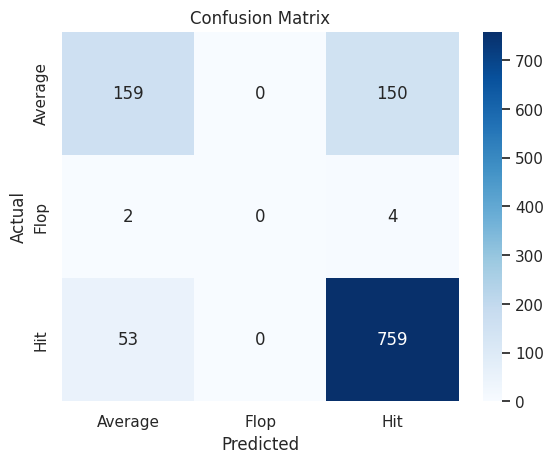

In [ ]:
# prompt: now train and evaluate the model random forest

# Train Random Forest model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=["Average", "Flop", "Hit"], yticklabels=["Average", "Flop", "Hit"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

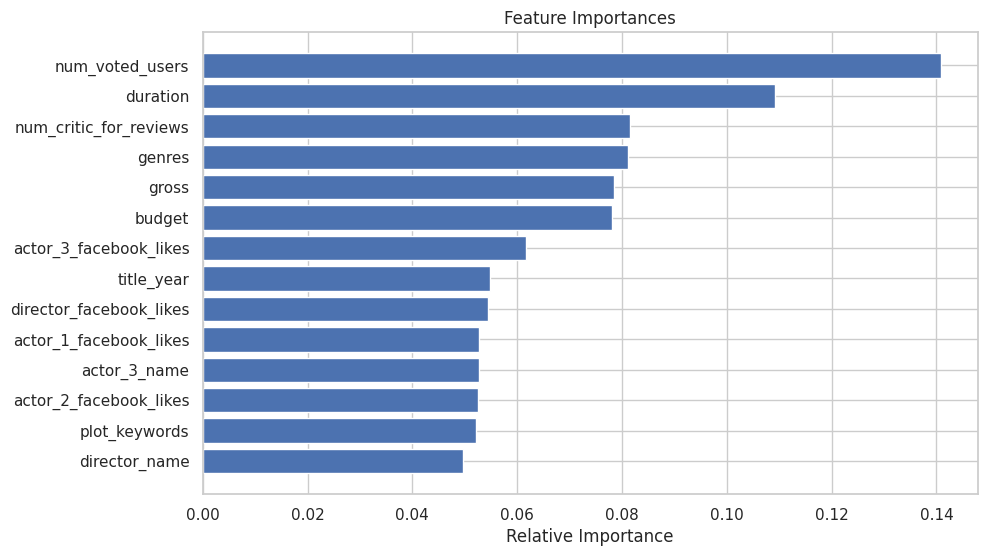

In [ ]:
feature_importances = rfc.feature_importances_

# Create a bar plot of feature importances
features = X.columns[rfecv.support_]  # Get the selected feature names
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **Logistic Regression**

Logistic Regression Accuracy: 0.7666370896184561
Logistic Regression Confusion Matrix:
[[120   0 189]
 [  1   0   5]
 [ 68   0 744]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Average       0.63      0.39      0.48       309
        Flop       0.00      0.00      0.00         6
         Hit       0.79      0.92      0.85       812

    accuracy                           0.77      1127
   macro avg       0.48      0.43      0.44      1127
weighted avg       0.75      0.77      0.74      1127



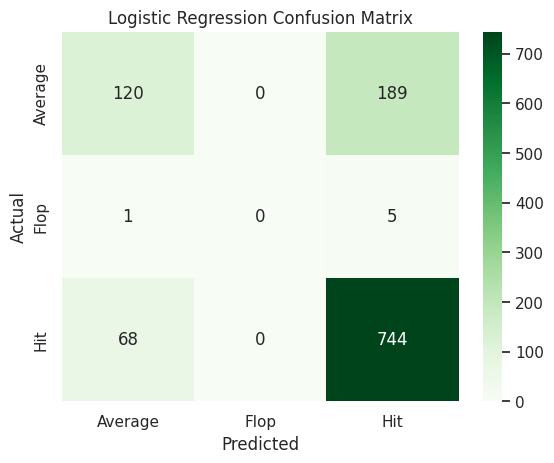

In [ ]:
# Train Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test_selected)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Generate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)

# Generate classification report
cr_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:")
print(cr_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',xticklabels=["Average", "Flop", "Hit"], yticklabels=["Average", "Flop", "Hit"])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Support Vector Machine**

SVM Accuracy: 0.7737355811889973
SVM Confusion Matrix:
[[115   0 194]
 [  2   0   4]
 [ 55   0 757]]
SVM Classification Report:
              precision    recall  f1-score   support

     Average       0.67      0.37      0.48       309
        Flop       0.00      0.00      0.00         6
         Hit       0.79      0.93      0.86       812

    accuracy                           0.77      1127
   macro avg       0.49      0.43      0.44      1127
weighted avg       0.75      0.77      0.75      1127



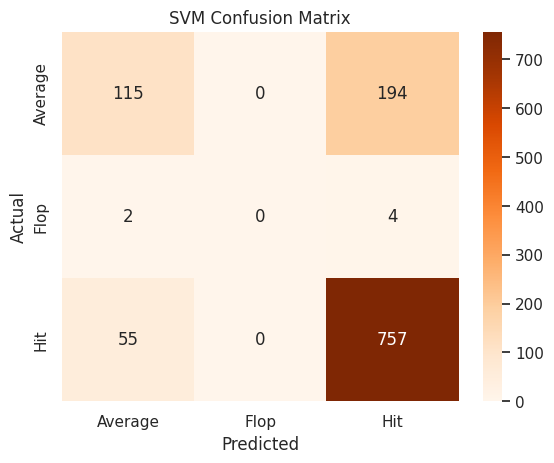

In [ ]:
# Train SVM model
svm = SVC(random_state=42)
svm.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test_selected)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Generate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)

# Generate classification report
cr_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(cr_svm)

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',xticklabels=["Average", "Flop", "Hit"], yticklabels=["Average", "Flop", "Hit"])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **XGBoost**

XGBoost Accuracy: 0.8145519077196096
XGBoost Confusion Matrix:
[[181   1 127]
 [  3   0   3]
 [ 75   0 737]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       309
           1       0.00      0.00      0.00         6
           2       0.85      0.91      0.88       812

    accuracy                           0.81      1127
   macro avg       0.52      0.50      0.51      1127
weighted avg       0.80      0.81      0.81      1127



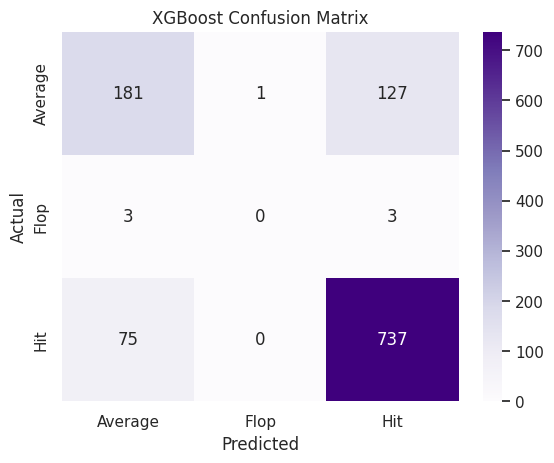

In [ ]:
# Fit the encoder to your training target variable
le.fit(y_train)

# Transform your training and testing target variables
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Train your XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test_selected)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Generate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost Confusion Matrix:")
print(cm_xgb)

# Generate classification report
cr_xgb = classification_report(y_test, y_pred_xgb)
print("XGBoost Classification Report:")
print(cr_xgb)

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples',xticklabels=["Average", "Flop", "Hit"], yticklabels=["Average", "Flop", "Hit"])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Decision Tree**

Decision Tree Accuracy: 0.735581188997338
Decision Tree Confusion Matrix:
[[160   8 141]
 [  2   0   4]
 [139   4 669]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52       309
           1       0.00      0.00      0.00         6
           2       0.82      0.82      0.82       812

    accuracy                           0.74      1127
   macro avg       0.45      0.45      0.45      1127
weighted avg       0.74      0.74      0.74      1127



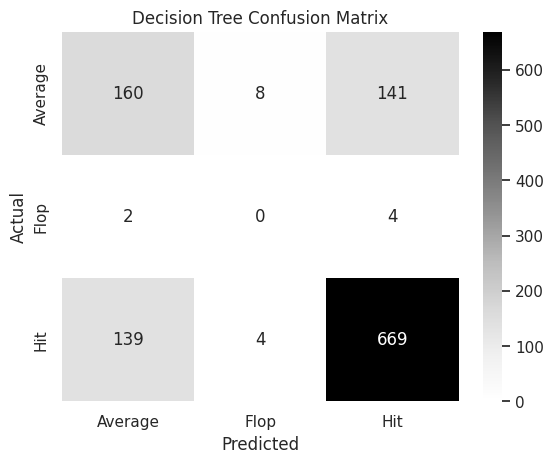

In [ ]:
# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test_selected)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(cm_dt)

# Generate classification report
cr_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(cr_dt)

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greys',xticklabels=["Average", "Flop", "Hit"], yticklabels=["Average", "Flop", "Hit"])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


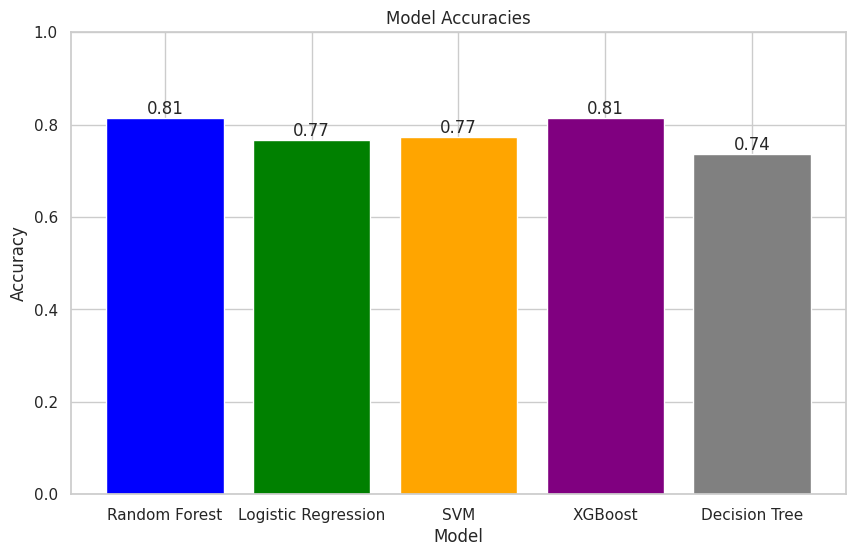

In [ ]:
# Model names and their corresponding accuracies
model_names = ['Random Forest', 'Logistic Regression', 'SVM', 'XGBoost', 'Decision Tree']
accuracies = [accuracy, accuracy_lr, accuracy_svm, accuracy_xgb, accuracy_dt]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'purple', 'gray'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limit to 0-1 for accuracy

# Adding accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


# **Hyperparameter Tuning (GridSearchCV)**
**Random Forest**

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy found:  0.808601122578309
Best Random Forest Accuracy: 0.805678793256433
Best Random Forest Confusion Matrix:
[[142   0 167]
 [  2   0   4]
 [ 46   0 766]]
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.46      0.57       309
           1       0.00      0.00      0.00         6
           2       0.82      0.94      0.88       812

    accuracy                           0.81      1127
   macro avg       0.52      0.47      0.48      1127
weighted avg       0.79      0.81      0.79      1127



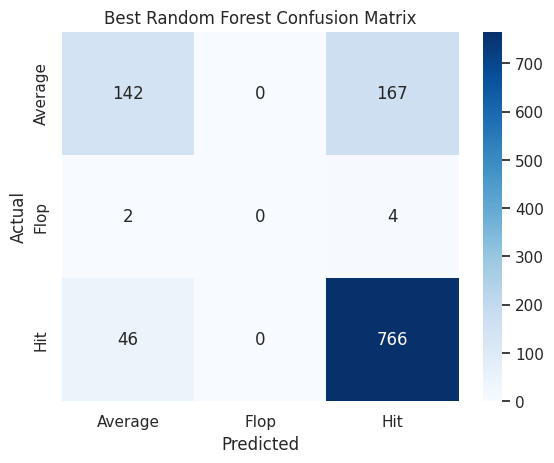

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5)

# Create a GridSearchCV object with StratifiedKFold
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Train Random Forest model with best hyperparameters
best_rfc = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rfc.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_best_rfc = best_rfc.predict(X_test_selected)

# Evaluate the model
accuracy_best_rfc = accuracy_score(y_test, y_pred_best_rfc)
print("Best Random Forest Accuracy:", accuracy_best_rfc)

# Generate confusion matrix
cm_best_rfc = confusion_matrix(y_test, y_pred_best_rfc)
print("Best Random Forest Confusion Matrix:")
print(cm_best_rfc)

# Generate classification report
cr_best_rfc = classification_report(y_test, y_pred_best_rfc)
print("Best Random Forest Classification Report:")
print(cr_best_rfc)

sns.heatmap(cm_best_rfc, annot=True, fmt='d', cmap='Blues',xticklabels=["Average", "Flop", "Hit"], yticklabels=["Average", "Flop", "Hit"])
plt.title('Best Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



**XGBoost**

Best parameters found for XGBoost:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Best accuracy found for XGBoost:  0.8238254571790693
Best XGBoost Accuracy: 0.8305235137533274
Best XGBoost Confusion Matrix:
[[182   0 127]
 [  3   0   3]
 [ 58   0 754]]
Best XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.59      0.66       309
           1       0.00      0.00      0.00         6
           2       0.85      0.93      0.89       812

    accuracy                           0.83      1127
   macro avg       0.53      0.51      0.52      1127
weighted avg       0.82      0.83      0.82      1127



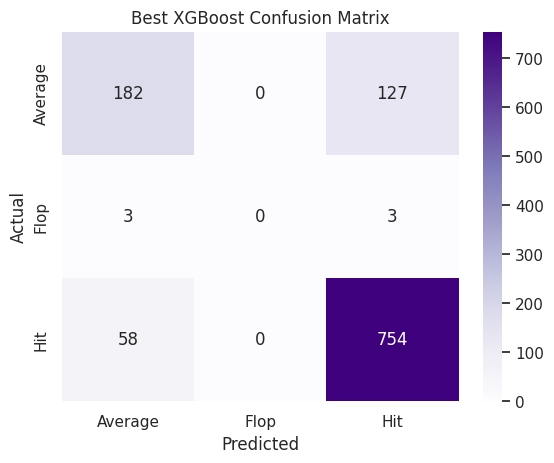

In [ ]:
# Define the parameter grid to search for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Fit the encoder to training target variable
le.fit(y_train)

# Transform training and testing target variables
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Create a GridSearchCV object with StratifiedKFold for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=stratified_kfold, scoring='accuracy')
grid_search_xgb.fit(X_train_selected, y_train_encoded)

print("Best parameters found for XGBoost: ", grid_search_xgb.best_params_)
print("Best accuracy found for XGBoost: ", grid_search_xgb.best_score_)

# Train XGBoost model with best hyperparameters
best_xgb = XGBClassifier(**grid_search_xgb.best_params_, random_state=42)
best_xgb.fit(X_train_selected, y_train_encoded)

# Make predictions on the test set

y_pred_best_xgb = best_xgb.predict(X_test_selected)

# Evaluate the model
accuracy_best_xgb = accuracy_score(y_test_encoded, y_pred_best_xgb)
print("Best XGBoost Accuracy:", accuracy_best_xgb)

# Generate confusion matrix
cm_best_xgb = confusion_matrix(y_test_encoded, y_pred_best_xgb)
print("Best XGBoost Confusion Matrix:")
print(cm_best_xgb)

# Generate classification report
cr_best_xgb = classification_report(y_test_encoded, y_pred_best_xgb)
print("Best XGBoost Classification Report:")
print(cr_best_xgb)

sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Purples',xticklabels=["Average", "Flop", "Hit"], yticklabels=["Average", "Flop", "Hit"])
plt.title('Best XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Creating new features and retraining the model

Optimal number of features: 27
Selected Features: ['director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'num_voted_users', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes', 'budget_popularity_interaction', 'gross_duration_interaction', 'actor_popularity', 'director_movie_popularity', 'budget_gross_ratio', 'duration_votes_ratio']
Accuracy: 0.8251996450754214
Confusion Matrix:
[[167   0 142]
 [  2   0   4]
 [ 49   0 763]]
Classification Report:
              precision    recall  f1-score   support

     Average       0.77      0.54      0.63       309
        Flop       0.00      0.00      0.00         6
         Hit       0.84      0.94      0.89       812

    accuracy                           0.83      1127
   macro avg       0.54

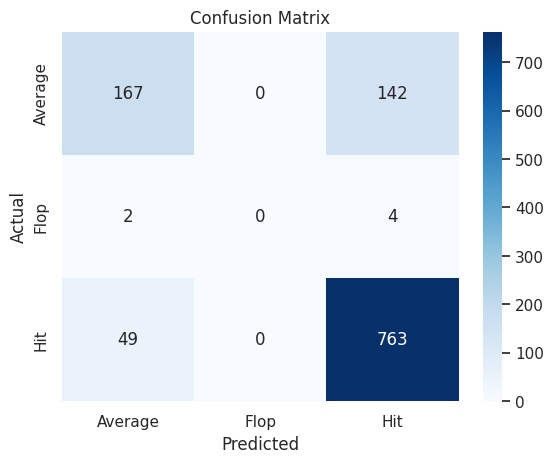

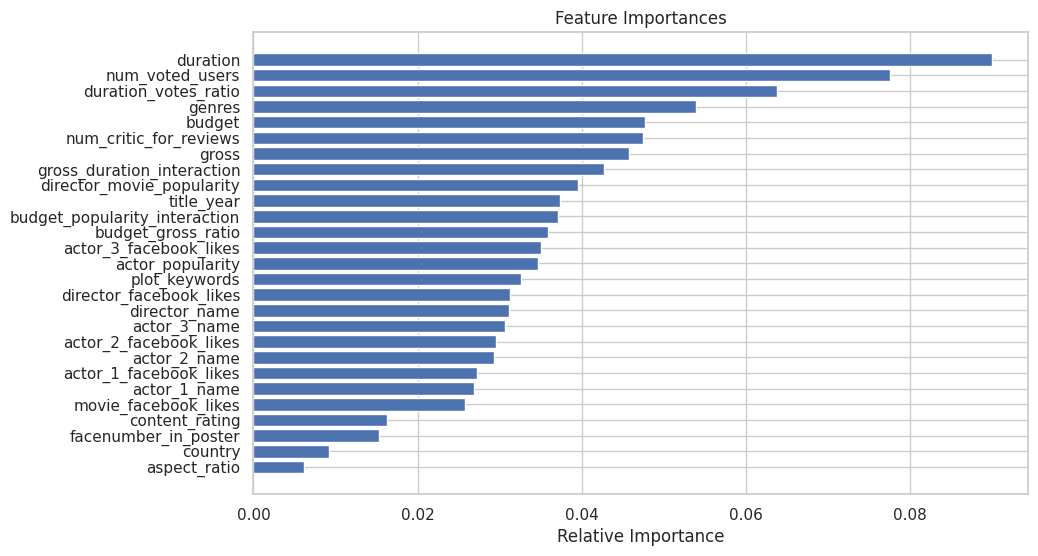

In [ ]:
# Try to engineer new features from existing ones or create interaction terms that might be relevant for predicting movie success.

# Create interaction terms between budget and popularity
df['budget_popularity_interaction'] = df['budget'] * df['movie_facebook_likes']

# Create interaction terms between gross and duration
df['gross_duration_interaction'] = df['gross'] * df['duration']

# Create a new feature that combines actor popularity
df['actor_popularity'] = df['actor_1_facebook_likes'] + df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']

# Create a new feature that combines director popularity and movie facebook likes
df['director_movie_popularity'] = df['director_facebook_likes'] + df['movie_facebook_likes']

# Create a new feature representing the ratio of budget to gross
df['budget_gross_ratio'] = df['budget'] / df['gross']

# Create a new feature representing the ratio of duration to the number of voted users
df['duration_votes_ratio'] = df['duration'] / df['num_voted_users']

# Separate features (X) and target variable (y)
X = df.drop('classify', axis=1)
y = df['classify']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data
scaler.fit(X_train)

# Transform training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# RFECV (you might need to adjust the estimator and parameters based on your new features)
rfc = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=stratified_kfold, scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected Features: %s" % list(X.columns[rfecv.support_]))

X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)


# Retrain your model (e.g., Random Forest) with the new features and selected features
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_selected, y_train)

y_pred = rfc.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Average", "Flop", "Hit"], yticklabels=["Average", "Flop", "Hit"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance plot
feature_importances = rfc.feature_importances_
features = X.columns[rfecv.support_]
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# **SMOTE (Synthetic Minority Over-sampling Technique)**

Class distribution before SMOTE: Counter({'Hit': 1898, 'Average': 711, 'Flop': 19})
Class distribution after SMOTE: Counter({'Average': 1898, 'Hit': 1898, 'Flop': 1898})
Accuracy: 0.8189884649511979
Confusion Matrix:
[[205   4 100]
 [  4   0   2]
 [ 92   2 718]]
Classification Report:
              precision    recall  f1-score   support

     Average       0.68      0.66      0.67       309
        Flop       0.00      0.00      0.00         6
         Hit       0.88      0.88      0.88       812

    accuracy                           0.82      1127
   macro avg       0.52      0.52      0.52      1127
weighted avg       0.82      0.82      0.82      1127



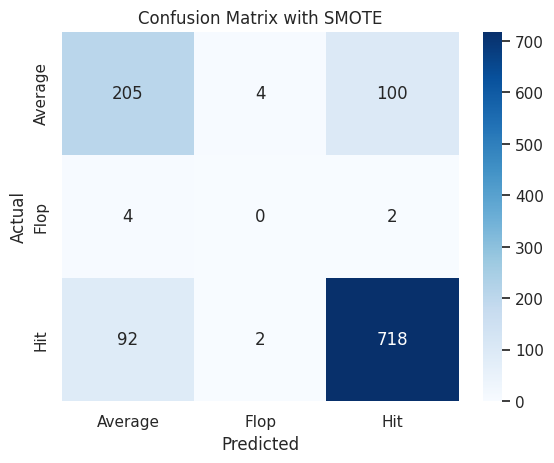

In [ ]:
# noticed that the 'Hit' class has a considerably larger number of instances compared to the other classes. This can lead to biased model predictions.
# We can address class imbalance using techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority classes or use weighted loss functions during model training.

print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Retrain your model with the resampled data
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Average", "Flop", "Hit"], yticklabels=["Average", "Flop", "Hit"])
plt.title('Confusion Matrix with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


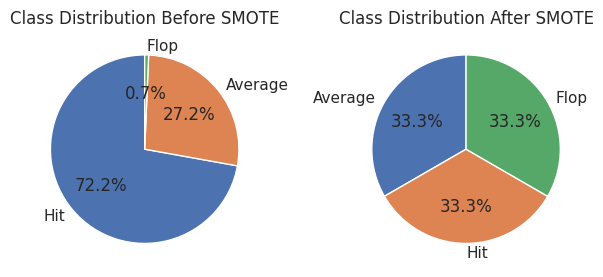

In [ ]:
# Class Distribution Before and After SMOTE (Pie Charts)
class_counts_before = df['classify'].value_counts()
class_counts_after = pd.Series(Counter(y_train_resampled))


plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution Before SMOTE')

plt.subplot(1, 2, 2)
plt.pie(class_counts_after, labels=class_counts_after.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution After SMOTE')

plt.tight_layout()
plt.show()

# **Prediction**

In [ ]:
# Selecting relevant features for the prediction
# Define selected features for prediction
selected_features = [
    "num_critic_for_reviews", "duration", "director_facebook_likes",
    "actor_3_facebook_likes", "actor_1_facebook_likes", "gross",
    "num_user_for_reviews", "budget", "title_year", "movie_facebook_likes"
]

# Create input widgets for each selected feature
feature_widgets = [widgets.FloatText(value=0.0, description=f'{feature}:') for feature in selected_features]

# Create a button for making predictions
predict_button = widgets.Button(description="Predict")

# Output widget to display prediction
output_widget = widgets.Output()

# Function to make a prediction based on user input
def predict(features):
    return best_rfc.predict(np.array(features).reshape(1, -1))

# Function to handle button click event
def on_button_click(b):
    user_input = [float(widget.value) for widget in feature_widgets]
    prediction = predict(user_input)

    # Display the prediction
    with output_widget:
        output_widget.clear_output()
        display(HTML(f"<b>Predicted IMDB Score:</b> {prediction[0]}"))

# Attach the button click event
predict_button.on_click(on_button_click)

# Display the input widgets and prediction button
display(*feature_widgets, predict_button, output_widget)


FloatText(value=0.0, description='num_critic_for_reviews:')

FloatText(value=0.0, description='duration:')

FloatText(value=0.0, description='director_facebook_likes:')

FloatText(value=0.0, description='actor_3_facebook_likes:')

FloatText(value=0.0, description='actor_1_facebook_likes:')

FloatText(value=0.0, description='gross:')

FloatText(value=0.0, description='num_user_for_reviews:')

FloatText(value=0.0, description='budget:')

FloatText(value=0.0, description='title_year:')

FloatText(value=0.0, description='movie_facebook_likes:')

Button(description='Predict', style=ButtonStyle())

Output()

**Conclusion:**

In this capstone project, our goal was to predict movie success based on IMDb scores, classifying films as "Hit," "Average," or "Flop" using a variety of machine learning models. Through thorough data exploration, feature engineering, and model development, we gained valuable insights into the factors influencing movie success.

**Model Performance:**

We experimented with several classifiers, including Random Forest, Logistic Regression, Support Vector Machine (SVM), Decision Tree, and XGBoost. Among these, Random Forest and XGBoost delivered the best performance, achieving the highest accuracy on the test set. After applying hyperparameter tuning through GridSearchCV, we optimized Random Forest, further enhancing its predictive power. SMOTE was employed to address the class imbalance in the dataset, as most movies were classified as "Average," making it challenging to predict "Hits" or "Flops."

**Key Metrics:**

The confusion matrix and classification report underscored that Random Forest and XGBoost performed exceptionally well, particularly in accurately predicting "Hits." Both models exhibited strong F1-scores and balanced precision/recall metrics. While accuracy was a primary performance measure, we also focused on precision and recall to better handle the imbalanced dataset, offering a more comprehensive evaluation of model performance.

**Challenges and Solutions:**

- **Class Imbalance:**  
  One of the key challenges was the imbalance between the three classes (Hit, Average, Flop). By using SMOTE, we improved the models' ability to predict the less common classes.

- **Data Quality:**  
  Missing data in critical columns such as budget and gross income posed a challenge. To address this, we removed rows with missing values, reducing the dataset size but ensuring cleaner data for training.

- **Feature Selection:**  
  We encountered multicollinearity among some predictors, which we addressed through correlation analysis and feature selection. This helped reduce redundancy and improved model interpretability.

**Conclusion:**

In summary, Random Forest and XGBoost emerged as the top-performing models. With further refinement and access to more detailed data (e.g., more recent or diverse movie features), these models have the potential to deliver even more accurate predictions, supporting film studios in making data-driven decisions for production and marketing strategies.